# Day 1 — Decision Tree Fundamentals
### Machine Learning Roadmap — Week 4
### Author — N Manish Kumar
---

So far, we have mostly worked with linear models such as Logistic Regression.

However, many real-world problems are not linearly separable. Decision Trees
are powerful non-linear models that can learn complex decision boundaries by
recursively splitting the feature space.

In this notebook, we will:
- Train Decision Tree classifiers with different depths
- Observe how model complexity affects performance
- Visualize tree structures
- Understand why trees tend to overfit

Dataset used: **Breast Cancer Dataset (sklearn)**

---

## 1. Dataset Loading and Train/Test Split

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

# Load dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Training set shape: (455, 30)
Test set shape: (114, 30)


---
## 2. Effect of Tree Depth on Model Performance

Decision Trees grow by splitting the data into smaller and smaller regions.

The maximum depth of the tree controls how complex the model becomes.

- Shallow trees → simple model → may underfit (high bias)
- Deep trees → very complex model → may overfit (high variance)

To observe this behavior, we train multiple trees with different maximum depths
and compare their training and test accuracy.


In [2]:
depths = [1, 3, 5, 10, None]

train_acc = []
test_acc = []

for d in depths:
    tree = DecisionTreeClassifier(max_depth=d, random_state=42)
    tree.fit(X_train, y_train)
    
    train_acc.append(accuracy_score(y_train, tree.predict(X_train)))
    test_acc.append(accuracy_score(y_test, tree.predict(X_test)))

for d, tr, te in zip(depths, train_acc, test_acc):
    print(f"Depth: {d}, Train Acc: {tr:.3f}, Test Acc: {te:.3f}")

Depth: 1, Train Acc: 0.923, Test Acc: 0.921
Depth: 3, Train Acc: 0.976, Test Acc: 0.939
Depth: 5, Train Acc: 0.993, Test Acc: 0.921
Depth: 10, Train Acc: 1.000, Test Acc: 0.912
Depth: None, Train Acc: 1.000, Test Acc: 0.912


### Interpretation

As tree depth increases, training accuracy usually increases because the model
can fit more detailed patterns in the data.

However, test accuracy may stop improving or even decrease for very deep trees,
which indicates overfitting.

An optimal depth often exists where the tree balances bias and variance,
achieving good generalization on unseen data.

---

## 3. Visualizing and Interpreting a Decision Tree

Decision Trees make predictions by applying a sequence of if–else rules
based on feature thresholds.

Visualizing the tree helps us understand:
- Which features are used first (most important splits)
- How the data is divided at each node
- Why trees are easy to interpret but prone to overfitting

We will visualize a tree with moderate depth to keep the structure readable.


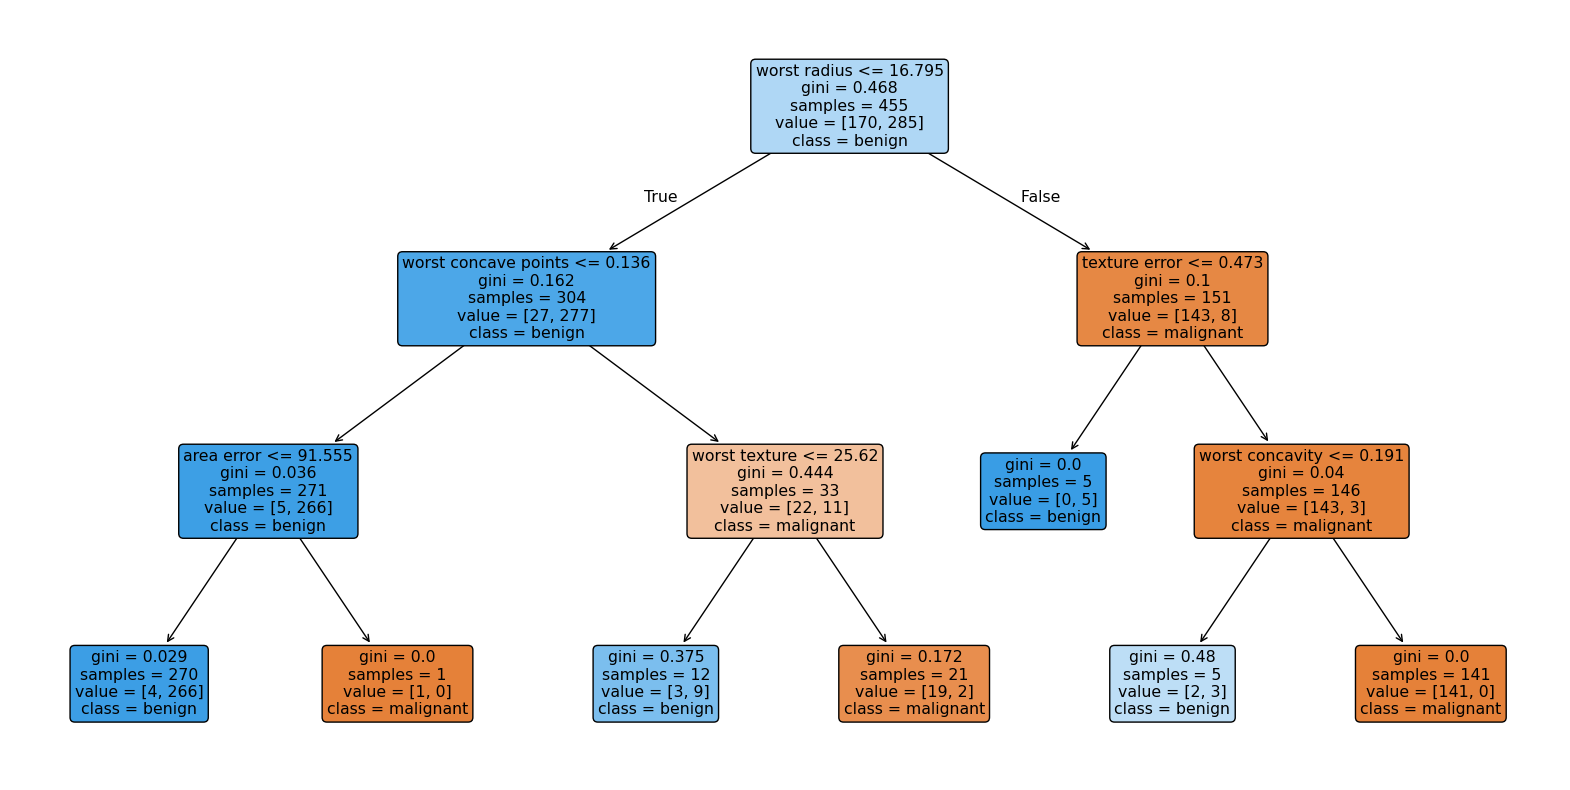

In [4]:
# Train a moderately deep tree for visualization
viz_tree = DecisionTreeClassifier(max_depth=3, random_state=42)
viz_tree.fit(X_train, y_train)

plt.figure(figsize=(20, 10))
plot_tree(
    viz_tree,
    feature_names=data.feature_names,
    class_names=data.target_names,
    filled=True,
    rounded=True
)
plt.show()

### Interpretation

The root node shows the first and most important split chosen by the tree.

Each node displays:
- The feature and threshold used for splitting
- Number of samples at that node
- Class distribution
- Predicted class

As we go deeper, nodes become more specific and represent smaller subsets of
the data, which explains why deeper trees can memorize training examples and
overfit.

---

## 4. Feature Importance in Decision Trees

Decision Trees can estimate how important each feature is based on how much
it reduces impurity across all splits in the tree.

Feature importance helps us:
- Understand which measurements influence predictions most
- Perform feature selection
- Gain domain insights (very useful in medical datasets)

We will extract and visualize feature importance from the trained tree.


In [5]:
importances = viz_tree.feature_importances_

importance_df = pd.DataFrame({
    "Feature": data.feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

importance_df.head(10)

,Feature,Importance
20,worst radius,0.763804
27,worst concave points,0.127061
11,texture error,0.047673
21,worst texture,0.033652
26,worst concavity,0.017869
13,area error,0.009940
5,mean compactness,0.000000
4,mean smoothness,0.000000
6,mean concavity,0.000000
7,mean concave points,0.000000


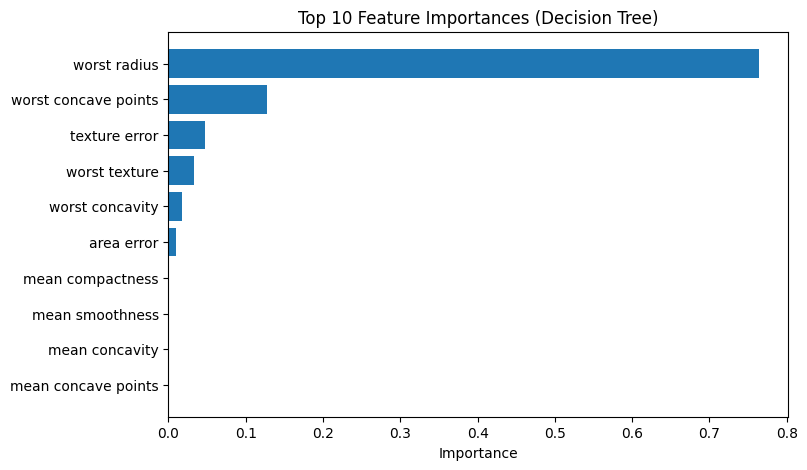

In [6]:
# Plot top 10 important features
top_features = importance_df.head(10)

plt.figure(figsize=(8, 5))
plt.barh(top_features["Feature"], top_features["Importance"])
plt.gca().invert_yaxis()
plt.xlabel("Importance")
plt.title("Top 10 Feature Importances (Decision Tree)")
plt.show()

### Interpretation

Features with higher importance contributed more to reducing impurity and
were used more frequently in top splits of the tree.

In medical datasets, seeing meaningful features ranked highly increases
confidence that the model is learning real biological patterns rather than
noise.

However, feature importance from a single tree can be unstable, which is why
ensemble methods like Random Forest provide more reliable importance estimates.

---

# Notebook Summary — Week 4 Day 1

In this notebook, we explored Decision Trees as non-linear classification
models and studied how model complexity affects generalization.

### What was done
- Loaded the Breast Cancer dataset and created train/test split
- Trained Decision Trees with different maximum depths
- Compared training and test accuracy to observe overfitting behavior
- Visualized a Decision Tree to understand decision rules
- Extracted and visualized feature importance

### Key Learnings
- Tree depth controls model complexity and overfitting
- Shallow trees may underfit, while deep trees can memorize data
- Decision Trees learn feature interactions automatically
- Tree visualization helps interpret how predictions are made
- Feature importance provides insight into influential variables

### Final Outcome
Decision Trees were shown to be powerful but prone to overfitting, motivating
the use of ensemble methods like Random Forests to improve stability and
generalization.
